In [1]:
# copy and paste your lines of code from the previous notebook where you read in the data

# import the package we need to read in the data
import pandas as pd

# create a variable called data that we assign the value of the data file
data = pd.read_csv('Data/gaia_stars.csv')


Copy and paste the column explanations you started in the last notebook

| Column Header | Definition | Unit |
| :- | :- | :- |
| Star ID | identification number of the star | no unit
| Mass [Solar Mass] | the mass of the star (how much stuff it has)  | Solar Mass (Mo); 1 is the mass of our Sun
| Radius [Solar Radius] | the radius of the star (how wide it is)  | Solar Radius (Ro); 1 is the radius of our Sun
| g band | brightness of the star in the g filter | magnitudes (bigger is dimmer)
| r band | brightness of the star in the r filter | magnitudes (bigger is dimmer)
| Temperature [K]| temperature of the star | Kelvin (scientific scale for temperature)
| Age [Gyr]| how many years the star has existed | Giga years (billion years); 1 Gyr is 1 billion years

## Density of Stars

Let's now explore the densities of stars. If you recall from STP, density is the amount of stuff something has (the mass) in a given space (the volume). **Looking at the data table, what variables might be helpful for us to calculate the density of stars?** 

**Answer: The mass and the radius**

The equation for density is $\ \rm D = \frac{Mass}{Volume}$. Stars are spheres whose volumes can be calculated using the equation $\ \rm V = \frac{4}{3}\pi r^3$, where r is the radius and $\pi$ is 3.14

In [2]:
# create variables for the mass and radius

mass = data['Mass [Solar Mass]']
radius = data['Radius [Solar Radius]']

In [3]:
# calculate the volume of the stars below
# make sure you save it to a variable with a helpful name
# the resulting units will be (Ro)^3

volume = 4 / 3 * 3.14 * radius**3

Text(0, 0.5, 'Mass [Mo]')

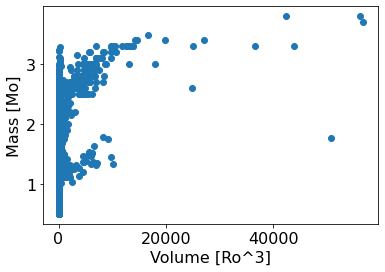

In [5]:
# let's make a mass vs volume plot, just like you did for STP!
# create a scatter plot where mass is on the y axis and volume is on the x axis
# don't forget to label both axes

# import our graphing package
import matplotlib.pyplot as plt

#the below is optional but makes the font a size I can read more easily
import matplotlib
matplotlib.rc('font', **{'family':'sans-serif', 'size':16}) 

plt.scatter(volume, mass)
plt.xlabel('Volume [Ro^3]')
plt.ylabel('Mass [Mo]')

**What range of masses does your graph show?**

**Answer:** 0.5 to 4 solar masses

**What range of volumes does your graph show?**

**Answer:** 0 to 60,000 cubic solar radius

(0.0, 15.0)

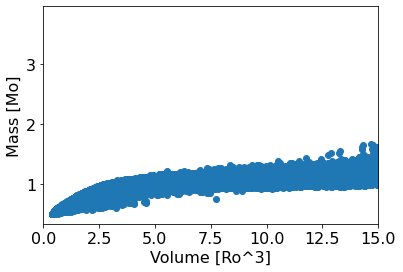

In [6]:
# the scatter plot has some mess in it! let's get rid of it by zooming in
# zoom in on a volume range of (0, 15)

plt.scatter(volume, mass)
plt.xlabel('Volume [Ro^3]')
plt.ylabel('Mass [Mo]')
plt.xlim(0,15)

**According to your graph set up...**

**What is the independent variable**

**Answer:?** The volume


**What is the dependent variable?**

**Answer:?** The mass


**What could a control variable be?**

**Answer:?** The kind of object measured is the same (all stars)


**Describe any pattern/trend (or lack of one) you see**

**Answer:** The mass increases a little with volume, especially until like 3 Ro^3. Then the shape flattens more. Most stars are along a narrow mass width

## Check in 

**Could a directly proportional model describe the data? Add notes from our class discussion below**

**Notes:** No! It has a curve and doesn't go through (0,0). But we know density is a directly proportional relationship! This means that one model (and therefore one slope) can't be used to describe all the data, or each star. If different stars have different slopes, it means they have different densities! Not all stars have the same density.

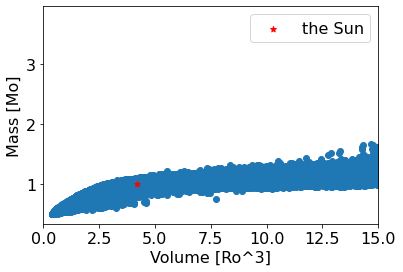

In [7]:
# add the sun to your zoomed in plot with a red star marker
# remember the Sun's mass is 1 Mo and its radius is 1 Ro
# label it "The Sun"

plt.scatter(volume, mass)
plt.scatter(4 / 3 * 3.14 * 1**3, 1, marker='*', color='red', label='the Sun')
plt.xlabel('Volume [Ro^3]')
plt.ylabel('Mass [Mo]')
plt.xlim(0,15)
plt.legend()

In [8]:
# let's change our units to match the units in your mass vs volume STP lab
# below are functions I have written that allow you to change units. you do not need to edit anything in this cell

# converts mass
def Mo_g(mass): # mass must be in Solar Masses
    kg = mass * 1.989e30 # convert to kg
    g = kg * 1e3 # convert to g
    return g

# converts volume
def Ro3_mL(volume): # volume must be in cubic Solar Radius
    km = volume * (695700)**3 # convert to km
    cm = km * (1e5)**3 # convert to cm
    mL = cm # convert to mL
    return mL

In [9]:
# edit the code below to change the units of your data

# convert the gaia sample
mass_g = Mo_g(mass) # fill in your variable name for mass
volume_mL = Ro3_mL(volume) # fill in your variable name for volume

# convert the Sun's mass and volume
Sun_mass = Mo_g(1) # fill in the Sun's mass in Mo
Sun_volume = Ro3_mL(4 / 3 * 3.14 * 1**3) # fill in the Sun's volume in Ro^3

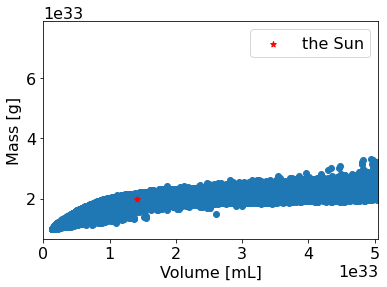

In [10]:
# make a new scatter plot showing mass vs volume for gaia and for the sun with our new units
# (it will be the same as your last plot but the units will change)
# you will need to change the xlim to (0, Ro3_mL(15))

plt.scatter(volume_mL, mass_g)
plt.scatter(Sun_volume, Sun_mass, marker='*', color='red', label='the Sun')
plt.xlabel('Volume [mL]')
plt.ylabel('Mass [g]')
plt.xlim(0,Ro3_mL(15))
plt.legend()

**What range of volumes does your graph show?**

**Answer:** 0 to 5x10^33 mL

**What range of masses does your graph show?**

**Answer:** 0 to 7x10^33 grams

## Sun Density

Since a directly proportional model won't describe the data well, let's calculate the density of the Sun. Remember density is $\ \rm D = \frac{Mass}{Volume}$  . Make sure your density is g/mL

In [11]:
# calculate the density of the Sun below

Sun_mass / Sun_volume # g/mL

1.4109134981738507

## Deliverable

Make a line plot showing the density of the Sun compared to the density of the 3 liquids you measured for STP. (So you should have a graph with 3 lines on it.) Customize and label the lines so that your graph is clear. Make sure we can easily read the fonts. Be ready to explain your plot and the choices you made to us. 

Text(0, 0.5, 'Mass [g]')

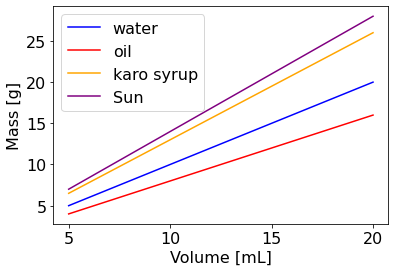

In [12]:
# create your line plot below

# fill in the volumes you measured for STP
# this will be your array for the x axis for each liquid and for the sun
volumes = [5, 10, 15, 20] #mL

# the below function will calculate the masses based on the density you put in
# you will need to use this function for each object
def masses(density): #g/mL
    mass = [a * density for a in volumes]
    return mass

water_mass = masses(1)
oil_mass = masses(.8)
karo_mass = masses(1.3)
sun_mass = masses(1.4)

plt.plot(volumes, water_mass, color='blue', label='water')
plt.plot(volumes, oil_mass, color='red', label='oil')
plt.plot(volumes, karo_mass, color='orange', label='karo syrup')
plt.plot(volumes, sun_mass, color='purple', label='Sun')
plt.legend()
plt.xlabel('Volume [mL]')
plt.ylabel('Mass [g]')

**Which liquid from your STP lab has the closest density to the Sun?**

**Answer: Karo syrup!**